In [16]:
# Import libraries
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set Seaborn style
sns.set_style("whitegrid")

from dotenv import load_dotenv
import os
from sqlalchemy import create_engine, text

# Load environment variables
load_dotenv()

DB_HOST = os.getenv("DB_HOST")
DB_PORT = int(os.getenv("DB_PORT"))  # Ensure integer
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

# Create connection
engine = create_engine(
    f'postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'
)

# Test connection
try:
    with engine.connect() as connection:
        result = connection.execute(text("SELECT version()"))
        print("✅ Connection successful. PostgreSQL version:", result.fetchone()[0])
except Exception as e:
    print("❌ Connection failed:", e)


✅ Connection successful. PostgreSQL version: PostgreSQL 17.5 on x86_64-windows, compiled by msvc-19.44.35209, 64-bit


|1| A table with 10 film titles

In [17]:

with engine.connect() as connection:
    query = text("SELECT title FROM film LIMIT 10")
    df = pd.read_sql_query(query, connection)


display(df)



,title
0,Chamber Italian
1,Grosse Wonderful
2,Airport Pollock
3,Bright Encounters
4,Academy Dinosaur
5,Ace Goldfinger
6,Adaptation Holes
7,Affair Prejudice
8,African Egg
9,Agent Truman


|2| Active Customers followed by a pie chart.

Active Customers: 584, Inactive Customers: 15


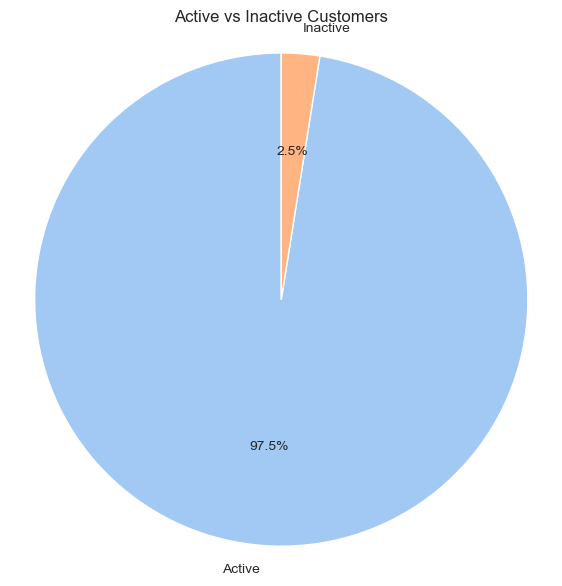

In [18]:
# Execute queries
with engine.connect() as connection:
    query_active = text("SELECT COUNT(*) AS active_count FROM customer WHERE active = 1")
    query_inactive = text("SELECT COUNT(*) AS inactive_count FROM customer WHERE active = 0")
    active_df = pd.read_sql_query(query_active, connection)
    inactive_df = pd.read_sql_query(query_inactive, connection)
    active_count = active_df['active_count'][0]
    inactive_count = inactive_df['inactive_count'][0]

# Display data
print(f"Active Customers: {active_count}, Inactive Customers: {inactive_count}")

# Visualize
plt.figure(figsize=(7, 7))
plt.pie([active_count, inactive_count], labels=['Active', 'Inactive'], colors=sns.color_palette("pastel")[0:2], autopct='%1.1f%%', startangle=90)
plt.title("Active vs Inactive Customers")
plt.axis('equal')
plt.show()





In [19]:
#Insight: With 584 active customers (97.5%) and only 15 inactive ones (2.5%), the business has an exceptionally high customer retention rate. This indicates a healthy and engaged customer base with very 
# low churn. The next step would be to investigate why those 15 customers became inactive to prevent future churn.

|3| A table with Total Number of Rentals followed by a bar plot.

,total_rentals
0,16044


C:\Users\abhin\AppData\Local\Temp\ipykernel_11596\756043560.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=['Total Rentals'], y='total_rentals', palette="Greens")


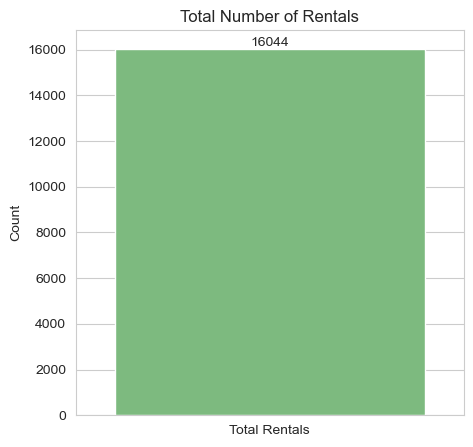

In [20]:
# Execute query
with engine.connect() as connection:
    query = text("SELECT COUNT(*) AS total_rentals FROM rental")
    df = pd.read_sql_query(query, connection)

# Display data
display(df)

# Visualize
plt.figure(figsize=(5, 5))
sns.barplot(data=df, x=['Total Rentals'], y='total_rentals', palette="Greens")
plt.title("Total Number of Rentals")
plt.ylabel("Count")
plt.text(0, df['total_rentals'][0], str(df['total_rentals'][0]), ha='center', va='bottom')
plt.show()

In [21]:
#Insight: The 16,044 rentals represent the store's total transaction volume. This number is a key performance indicator (KPI) that serves as a baseline for the business's overall activity. 
# Its primary value is for trend analysis—tracking this metric over time (e.g., month-over-month) would show if the business is growing, shrinking, or remaining stable.

|4| Total Amount Spent by Each Customer and Top 10 customers by Total amount spent followed by Barplot

,customer_id,customer_name,total_spent
0,148,Eleanor Hunt,211.55
1,526,Karl Seal,208.58
2,178,Marion Snyder,194.61
3,137,Rhonda Kennedy,191.62
4,144,Clara Shaw,189.60
...,...,...,...
594,110,Tiffany Jordan,49.88
595,320,Anthony Schwab,47.85
596,248,Caroline Bowman,37.87
597,281,Leona Obrien,32.90


C:\Users\abhin\AppData\Local\Temp\ipykernel_11596\155997989.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.head(10), x='customer_name', y='total_spent', palette="viridis")


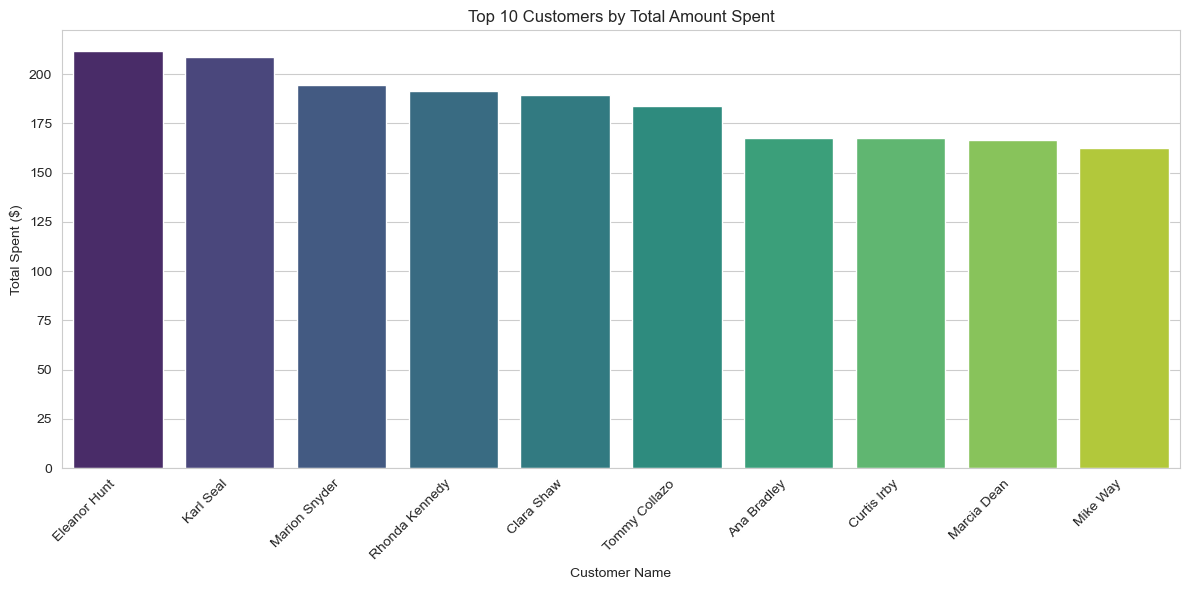

In [22]:

with engine.connect() as connection:
    query = text("""
        SELECT 
            c.customer_id,
            c.first_name || ' ' || c.last_name AS customer_name,
            SUM(p.amount) AS total_spent
        FROM 
            customer c
        INNER JOIN 
            payment p ON c.customer_id = p.customer_id
        GROUP BY 
            c.customer_id, c.first_name, c.last_name
        ORDER BY 
            total_spent DESC
    """)
    df = pd.read_sql_query(query, connection)

# Display data
display(df)


import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=df.head(10), x='customer_name', y='total_spent', palette="viridis")
plt.title("Top 10 Customers by Total Amount Spent")
plt.xlabel("Customer Name")
plt.ylabel("Total Spent ($)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [23]:
#Insight: This query identifies your VIP customers. Eleanor Hunt, Karl Seal, and Marion Snyder are the top contributors to revenue. This insight is highly actionable. This list can be used for:

#Targeted Marketing: Creating a loyalty program or offering exclusive discounts.

#Personalized Engagement: Building stronger customer relationships.

#Strategic Decisions: Understanding the value of top customers justifies spending more to retain them.

|5| Number of Customers in Each Store

,store_id,customer_count
0,1,326
1,2,273


C:\Users\abhin\AppData\Local\Temp\ipykernel_11596\2407947558.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='store_id', y='customer_count', palette="Greens")


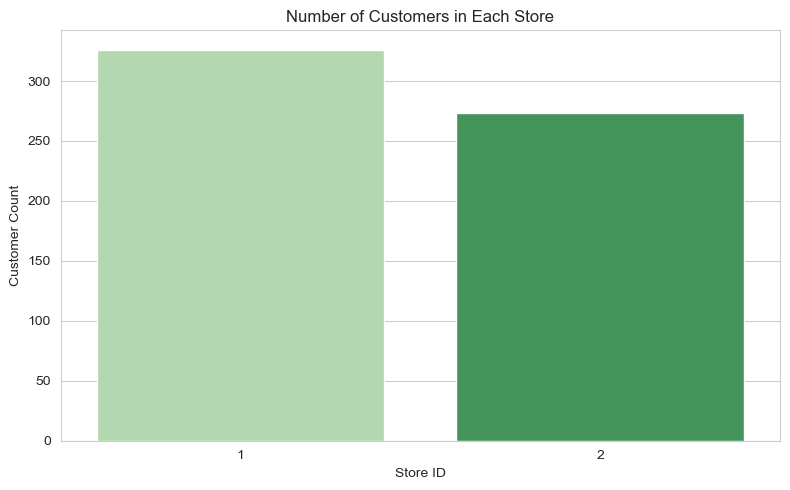

In [24]:
with engine.connect() as connection:
    query = text("""
        SELECT 
            store_id,
            COUNT(*) AS customer_count
        FROM 
            customer
        GROUP BY 
            store_id
        ORDER BY 
            store_id
    """)
    df = pd.read_sql_query(query, connection)

# Display data
display(df)


import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='store_id', y='customer_count', palette="Greens")
plt.title("Number of Customers in Each Store")
plt.xlabel("Store ID")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()

|6| Films in Each Category

,category_id,category_name,film_count
0,1,Action,64
1,2,Animation,66
2,3,Children,60
3,4,Classics,57
4,5,Comedy,58
5,6,Documentary,68
6,7,Drama,62
7,8,Family,69
8,9,Foreign,73
9,10,Games,61


C:\Users\abhin\AppData\Local\Temp\ipykernel_11596\1973758177.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='category_name', y='film_count', palette="Blues")


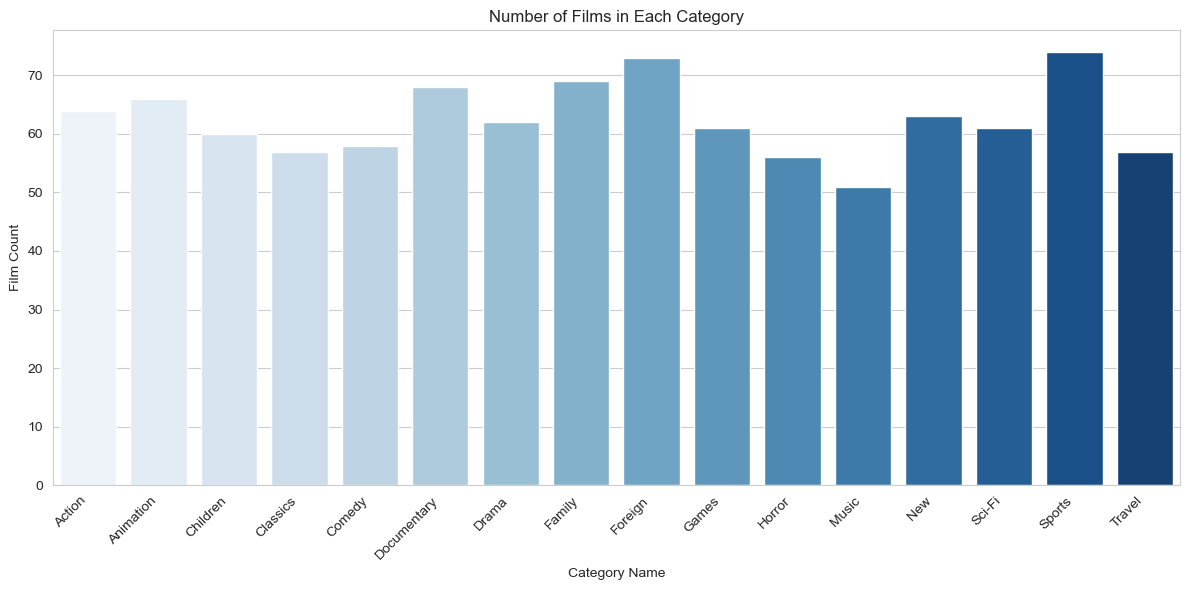

In [25]:
with engine.connect() as connection:
    query = text("""
        SELECT 
            c.category_id,
            c.name AS category_name,
            COUNT(f.film_id) AS film_count
        FROM 
            category c
        INNER JOIN 
            film_category fc ON c.category_id = fc.category_id
        INNER JOIN 
            film f ON fc.film_id = f.film_id
        GROUP BY 
            c.category_id, c.name
        ORDER BY 
            c.category_id
    """)
    df = pd.read_sql_query(query, connection)

# Display data
display(df)


import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='category_name', y='film_count', palette="Blues")
plt.title("Number of Films in Each Category")
plt.xlabel("Category Name")
plt.ylabel("Film Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

|7|Ranking Films by Rental Rate within Each Category

In [26]:
with engine.connect() as connection:
    query = text("""
        SELECT 
            f.film_id,
            c.name AS category_name,
            f.rental_rate,
            RANK() OVER (PARTITION BY c.category_id ORDER BY f.rental_rate DESC) AS rental_rate_rank
        FROM 
            film f
        INNER JOIN 
            film_category fc ON f.film_id = fc.film_id
        INNER JOIN 
            category c ON fc.category_id = c.category_id
        ORDER BY 
            c.name, rental_rate_rank
    """)
    df = pd.read_sql_query(query, connection)

# Display data
display(df)

,film_id,category_name,rental_rate,rental_rate_rank
0,911,Action,4.99,1
1,915,Action,4.99,1
2,579,Action,4.99,1
3,21,Action,4.99,1
4,659,Action,4.99,1
...,...,...,...,...
995,848,Travel,0.99,42
996,868,Travel,0.99,42
997,981,Travel,0.99,42
998,894,Travel,0.99,42


|8|Monthly Rental Trend Analysis

In [27]:
with engine.connect() as connection:
    query = text("""
        SELECT 
            DATE_TRUNC('month', r.rental_date) AS month,
            COUNT(r.rental_id) AS rental_count
        FROM 
            rental r
        GROUP BY 
            month
        ORDER BY 
            month
    """)
    df = pd.read_sql_query(query, connection)

# Display data
display(df)

,month,rental_count
0,2005-05-01,1156
1,2005-06-01,2311
2,2005-07-01,6709
3,2005-08-01,5686
4,2006-02-01,182


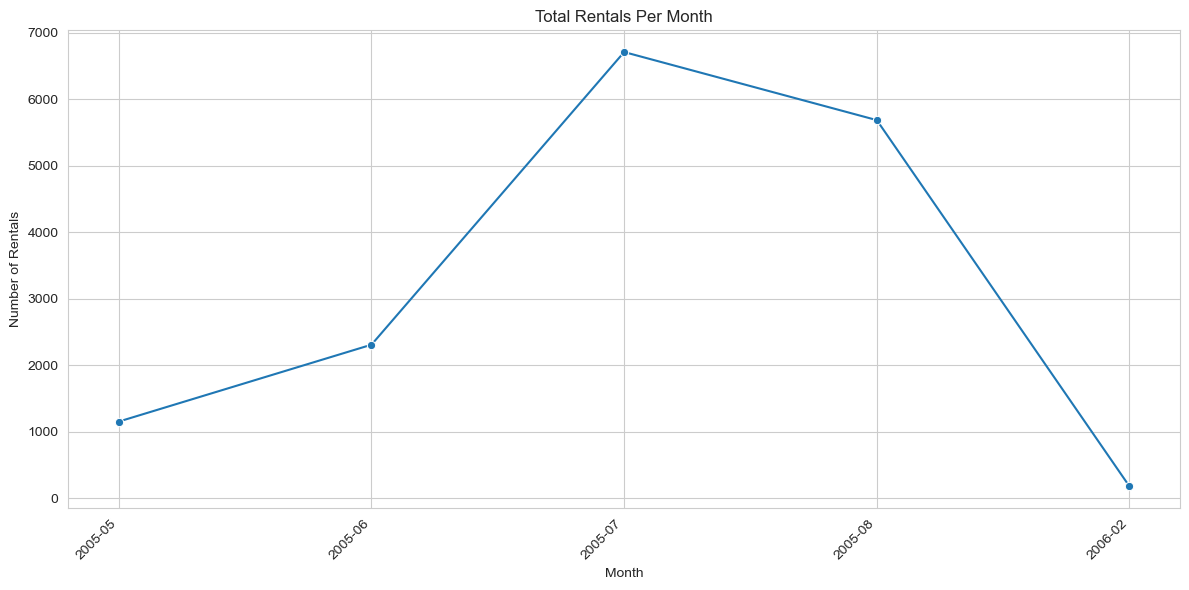

In [28]:

df['month'] = pd.to_datetime(df['month']).dt.strftime('%Y-%m')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='month', y='rental_count', marker='o')
plt.title("Total Rentals Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Rentals")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Summary:"This analysis of the DVD rental business reveals a healthy operation with high customer retention and clear peaks . Key opportunities include leveraging the list of VIP customers for targeted promotions and investigating the performance gap between Store 1 and Store 2 to drive growth."